<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
# Check the data
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


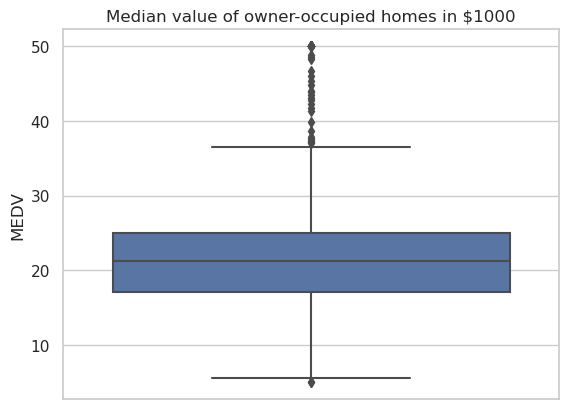

In [4]:
#Task2-1 A Box plot for the "Median value of owner-occupied homes" using seaborn library
sns.set(style="whitegrid")
ax = sns.boxplot(y="MEDV", data=boston_df).set_title('Median value of owner-occupied homes in $1000')
pyplot.show()

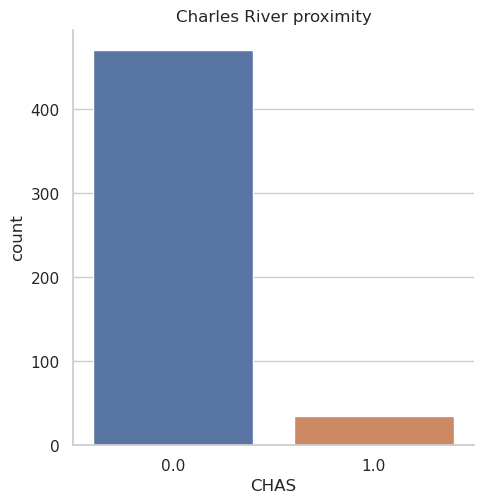

In [5]:
#Task2-2 A Bar plot for the Charles river variable
#boston_df['CHAS'].describe()
ax = sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title('Charles River proximity')
pyplot.show()

In [6]:
#Task2-3 A Box plot for the MEDV vs AGE in three groups
# Age grouping
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35yrs and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '35 to 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70yrs and older'
custom_dict = {'35yrs and younger': 0, '35 to 70 years': 1, '70yrs and older': 2} 

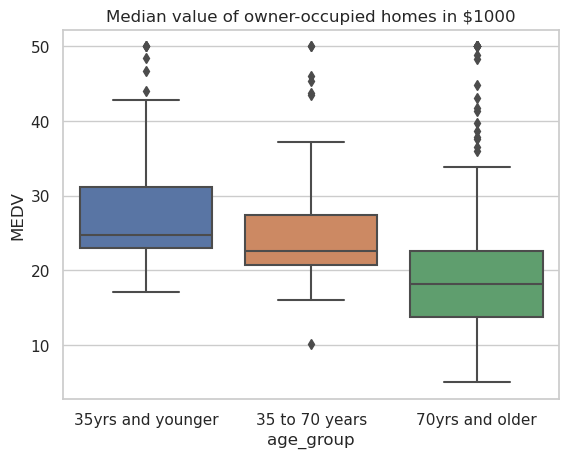

In [7]:
# Plot
ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df.sort_values(by=['age_group'], key=lambda x: x.map(custom_dict))).set_title('Median value of owner-occupied homes in $1000')
pyplot.show()

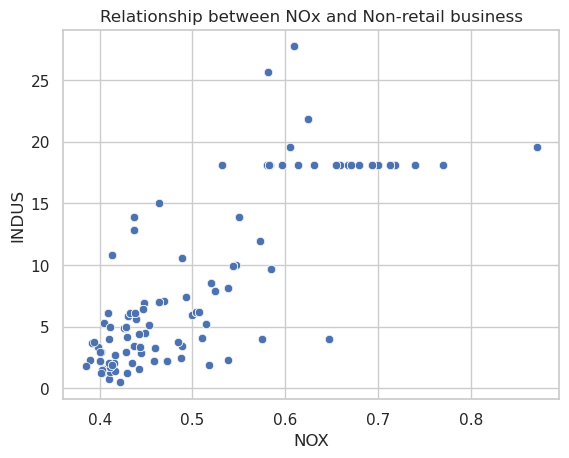

In [8]:
#Task2-4 A Scatter plot for the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df).set_title('Relationship between NOx and Non-retail business')
pyplot.show()

<b>Conclusion: The higher concentration of NOx and the proportion of non-retail businesses exhibit a correlation.</b>

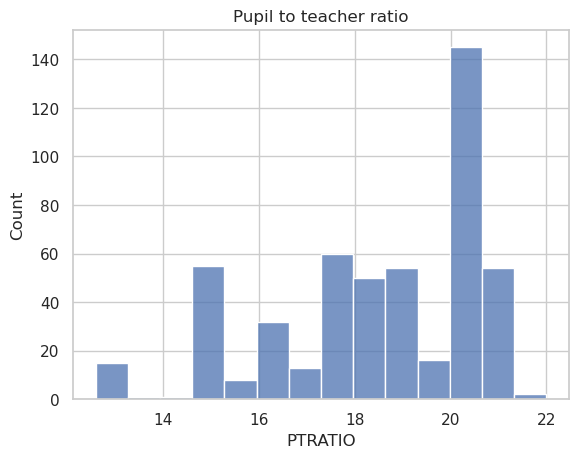

In [9]:
#Task2-5 A Histogram for the pupil to teacher ratio 
ax = sns.histplot(x="PTRATIO", data=boston_df).set_title('Pupil to teacher ratio')
pyplot.show()

In [10]:
#Task3-1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# Alpha = 0.05
boston_df[boston_df['CHAS'] == 0]['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 471, dtype: float64

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value between the Charles river bounded or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value between the Charles river bounded or not")

In [11]:
# Use the Levene's Test to check test significance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference.

In [12]:
# Use the ttest_ind from the scipy_stats library
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var='True')

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

<b>Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference</b>

In [13]:
#Task3-2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#Alpha = 0.05
boston_df[boston_df['age_group'] == '35yrs and younger']['MEDV']

16     23.1
38     24.7
39     30.8
40     34.9
41     26.6
       ... 
349    26.6
352    18.6
354    18.2
355    20.6
495    23.1
Name: MEDV, Length: 91, dtype: float64

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [14]:
# Test with Levene's model to test for equality of variance
scipy.stats.levene(boston_df[boston_df['age_group'] == '35yrs and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == '35 to 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70yrs and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05 we can assume equality of variance in median value based on age group.

In [15]:
# Set variables for each age groups
young_age = boston_df[boston_df['age_group'] == '35yrs and younger']['MEDV']
middle_age = boston_df[boston_df['age_group'] == '35 to 70 years']['MEDV']
old_age = boston_df[boston_df['age_group'] == '70yrs and older']['MEDV']

In [16]:
# Run a one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(young_age, middle_age, old_age)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


<b>Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.</b>

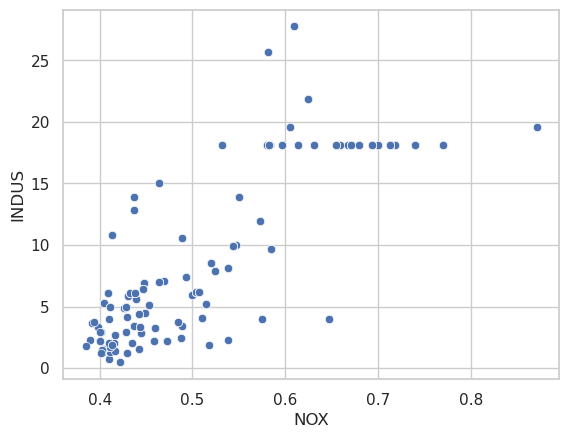

In [17]:
#Task3-3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#Alpha = 0.05
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

State the hypothesis:

*   $H\_0:$ Nitric oxide concentration is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentration is correlated with proportion of non-retail business acres per town

In [18]:
# Pearson correlation test, both variables, NOX and INDUS are continuous.
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

<b>Conclusion: Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between two variables, NOX and INDUS.</b>

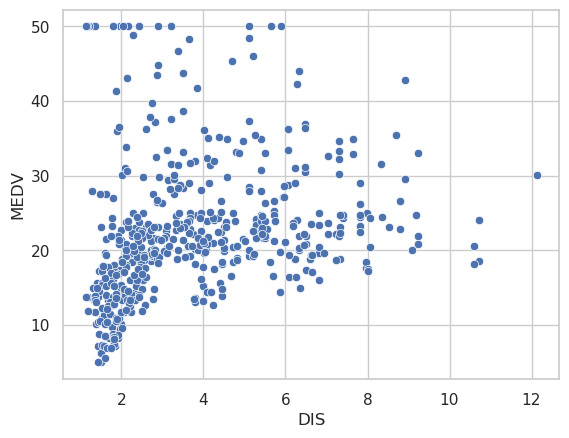

In [19]:
#Task3-4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#Alpha = 0.05
# DIS vs MEDV, two continous variables - correlation
ax = sns.scatterplot(x="DIS", y="MEDV", data=boston_df)

We will state the null hypothesis:
*   $H\_0:$ Weighted destance to the Boston employment centres is not correlated with the median values
*   $H\_1:$ Weighted destance to the Boston employment centres is correlated with the median values

In [20]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        09:49:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Conclusion: Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between two variables, DIS and MEDV.</b>

In [27]:
#Coefficient of correlation
import math
coc = math.sqrt(0.062)
print("Coefficient of correlation = ", coc)

Coefficient of correlation =  0.24899799195977465
